Analysis of Product Data Set.

Loading the Libraries.

In [1]:
# Import numpy and pandas
import numpy as np
import pandas as pd
import seaborn as sns
import plotly as py
import plotly.graph_objs as go # https://plotly.com/python/line-charts/
import plotly.express as px

ValueError: 
    Invalid value of type 'builtins.str' received for the 'template' property of layout
        Received value: 'simple_white'

    The 'template' property is an instance of Template
    that may be specified as:
      - An instance of plotly.graph_objs.layout.Template
      - A dict of string/value properties that will be passed
        to the Template constructor

        Supported dict properties:
            
            data
                plotly.graph_objects.layout.template.Data
                instance or dict with compatible properties
            layout
                plotly.graph_objects.Layout instance or dict
                with compatible properties

      - The name of a registered template where current registered templates
        are stored in the plotly.io.templates configuration object. The names
        of all registered templates can be retrieved with:
            >>> import plotly.io as pio
            >>> list(pio.templates)
      - A string containing multiple registered template names, joined on '+'
        characters (e.g. 'template1+template2'). In this case the resulting
        template is computed by merging together the collection of registered 
        templates

In [46]:
df_product_a = pd.read_csv("product_a.csv", index_col = "Unnamed: 0")

In [47]:
df_product_a.head(10)

,date_w,price,total_vol,plu1,plu2,plu3,bags_t,bags_s,bags_l,bags_lx,type,year,location
0,2016-12-24,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,A,2015,Albany
1,2016-12-17,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,A,2015,Albany
2,2016-12-10,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,A,2015,Albany
3,2016-12-03,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,A,2015,Albany
4,2016-11-26,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,A,2015,Albany
5,2016-11-19,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,A,2015,Albany
6,2016-11-12,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,A,2015,Albany
7,2016-11-05,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,A,2015,Albany
8,2016-10-29,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,A,2015,Albany
9,2016-10-22,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,A,2015,Albany


In [48]:
df_product_a.dtypes

date_w        object
price        float64
total_vol    float64
plu1         float64
plu2         float64
plu3         float64
bags_t       float64
bags_s       float64
bags_l       float64
bags_lx      float64
type          object
year           int64
location      object
dtype: object

In [49]:
#df_product_a["date_w"] = as.date()
#df_product_a['date_w'] = df_product_a['date_w'].astype(object).astype('date_w')
df_product_a['date_w'] = pd.to_datetime(df_product_a['date_w'])


#https://stackoverflow.com/questions/38333954/converting-object-to-datetime-format-in-python

In [50]:
df_product_a.dtypes

date_w       datetime64[ns]
price               float64
total_vol           float64
plu1                float64
plu2                float64
plu3                float64
bags_t              float64
bags_s              float64
bags_l              float64
bags_lx             float64
type                 object
year                  int64
location             object
dtype: object

In [51]:
#df_product_a['date_w'] = pd.DatetimeIndex(df_product_a['year']).year
df_product_a['year'] = pd.DatetimeIndex(df_product_a['date_w']).year

#https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-separately-from-pandas-datetime-column/43561379#43561379

In [52]:
df_product_a.head(10)

,date_w,price,total_vol,plu1,plu2,plu3,bags_t,bags_s,bags_l,bags_lx,type,year,location
0,2016-12-24,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,A,2016,Albany
1,2016-12-17,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,A,2016,Albany
2,2016-12-10,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,A,2016,Albany
3,2016-12-03,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,A,2016,Albany
4,2016-11-26,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,A,2016,Albany
5,2016-11-19,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,A,2016,Albany
6,2016-11-12,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,A,2016,Albany
7,2016-11-05,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,A,2016,Albany
8,2016-10-29,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,A,2016,Albany
9,2016-10-22,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,A,2016,Albany


In [10]:
Create df_stats with the following details from df_product_a
Columns: filed_name, minimum, maximum, mean, standard deviation, variance, mode,
median, 10th, 20th .. 90th percentiles, 1st, 2nd and 3rd quartiles, interquartile distance,
skewness and kurtosis.

SyntaxError: invalid syntax (<ipython-input-10-aa86c37ad3cb>, line 1)

In [70]:
# df_stats = pd.DataFrame([df_product_a.min(), df_product_a.max(), df_product_a.mean(), df_product_a.std(), df_product_a.var(), df_product_a.skew() ], index=['min', 'max', 'Mean', 'Std. dev', 'Variance', 'skew'])
df_stats = pd.DataFrame(df_product_a.describe().T)


In [71]:
df_stats

,count,mean,std,min,25%,50%,75%,max
price,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
total_vol,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
plu1,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
plu2,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
plu3,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
bags_t,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
bags_s,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
bags_l,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
bags_lx,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65
year,18249.0,2017.136062,9.417248e-01,2016.00,2016.00,2017.00,2018.00,2019.00


In [93]:
df_stats['variance'] =  df_product_a.var()
df_stats['skeweness'] = df_product_a.skew() 
#df_stats['mode'] = df_product_a.mode().T

# 
df_stats["Kurtosis"] = df_product_a.kurtosis()

In [94]:
df_stats

,count,mean,std,min,25%,50%,75%,max,var,skew,...,30,40,50,60,70,80,90,variance,skeweness,Kurtosis
price,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25,1.621484e-01,0.580303,...,1.150,1.260,1.37,1.480,1.600,1.740,1.930,1.621484e-01,0.580303,0.325196
total_vol,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52,1.192698e+13,9.007687,...,15181.304,42137.088,107376.76,192430.124,319613.142,604868.968,1387045.760,1.192698e+13,9.007687,92.104458
plu1,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17,1.600197e+12,8.648220,...,1368.118,3261.580,8645.30,31698.078,77991.410,152679.068,538385.184,1.600197e+12,8.648220,86.809113
plu2,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61,1.449906e+12,8.942466,...,4265.508,10961.994,29061.02,53202.052,98296.168,222163.620,500784.552,1.449906e+12,8.942466,91.949022
plu3,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11,1.154853e+10,10.159396,...,0.000,42.704,184.99,768.782,3466.120,10972.600,31492.442,1.154853e+10,10.159396,132.563441
bags_t,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37,9.726741e+11,9.756072,...,7316.634,16643.260,39743.83,62361.468,88901.748,149306.360,442141.928,9.726741e+11,9.756072,112.272156
bags_s,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80,5.567824e+11,9.540660,...,4761.328,11502.076,26362.82,46725.754,68884.094,104537.112,354266.852,5.567824e+11,9.540660,107.012885
bags_l,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61,5.951939e+10,9.796455,...,329.944,1105.110,2647.71,6087.796,14392.206,34350.986,94295.338,5.951939e+10,9.796455,117.999481
bags_lx,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65,3.130385e+08,13.139751,...,0.000,0.000,0.00,0.000,20.252,557.114,3688.912,3.130385e+08,13.139751,233.602612
year,18249.0,2017.136062,9.417248e-01,2016.00,2016.00,2017.00,2018.00,2019.00,8.868455e-01,0.236723,...,2016.000,2017.000,2017.00,2017.000,2018.000,2018.000,2018.000,8.868455e-01,0.236723,-1.027578


In [95]:
#10th, 20th .. 90th percentiles, 1st, 2nd and 3rd quartiles, interquartile distance, skewness and kurtosis

# df_product_a.quantile(.1)
# df_product_a.quantile([.1, .5])

# https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html
#numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
#Return evenly spaced numbers over a specified interval.
#Returns num evenly spaced samples, calculated over the interval [start, stop].
#The endpoint of the interval can optionally be excluded.

quantiles = pd.DataFrame(df_product_a.quantile(np.linspace(.1, 1, 9, 0))).T

In [96]:
quantiles.columns = ['10%','20%','30%','40%','50%','60%','70%','80%','90%']

In [97]:
df_stats = pd.concat([df_stats,quantiles], axis = 1)

In [98]:
df_stats

,count,mean,std,min,25%,50%,75%,max,var,skew,...,Kurtosis,10%,20%,30%,40%,50%,60%,70%,80%,90%
price,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25,1.621484e-01,0.580303,...,0.325196,0.930,1.050,1.150,1.260,1.37,1.480,1.600,1.740,1.930
total_vol,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52,1.192698e+13,9.007687,...,92.104458,3896.768,8168.866,15181.304,42137.088,107376.76,192430.124,319613.142,604868.968,1387045.760
plu1,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17,1.600197e+12,8.648220,...,86.809113,94.276,483.362,1368.118,3261.580,8645.30,31698.078,77991.410,152679.068,538385.184
plu2,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61,1.449906e+12,8.942466,...,91.949022,367.484,1918.532,4265.508,10961.994,29061.02,53202.052,98296.168,222163.620,500784.552
plu3,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11,1.154853e+10,10.159396,...,132.563441,0.000,0.000,0.000,42.704,184.99,768.782,3466.120,10972.600,31492.442
bags_t,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37,9.726741e+11,9.756072,...,112.272156,1299.208,3347.674,7316.634,16643.260,39743.83,62361.468,88901.748,149306.360,442141.928
bags_s,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80,5.567824e+11,9.540660,...,107.012885,583.110,1686.086,4761.328,11502.076,26362.82,46725.754,68884.094,104537.112,354266.852
bags_l,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61,5.951939e+10,9.796455,...,117.999481,0.000,30.918,329.944,1105.110,2647.71,6087.796,14392.206,34350.986,94295.338
bags_lx,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65,3.130385e+08,13.139751,...,233.602612,0.000,0.000,0.000,0.000,0.00,0.000,20.252,557.114,3688.912
year,18249.0,2017.136062,9.417248e-01,2016.00,2016.00,2017.00,2018.00,2019.00,8.868455e-01,0.236723,...,-1.027578,2016.000,2016.000,2016.000,2017.000,2017.00,2017.000,2018.000,2018.000,2018.000


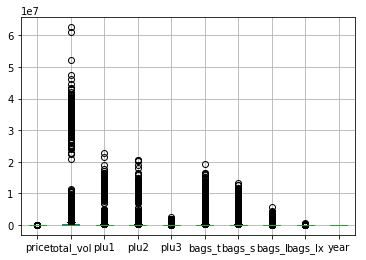

In [15]:
a = df_product_a.boxplot()

In [ ]:
Create a Pearson correlation matrix (it is a square matrix) between all the possible fields.
What are the conclusions you make?

#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

In [117]:
corrp = df_product_a.corr( method='pearson', min_periods = 1) 

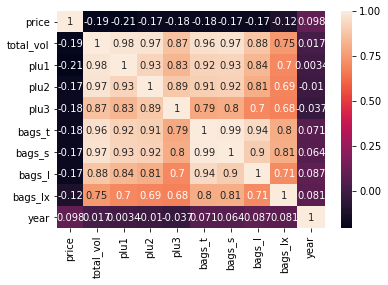

In [118]:
sns.heatmap(corrp,  annot = True)

In [120]:
corrs = df_product_a.corr( method='spearman', min_periods=1)

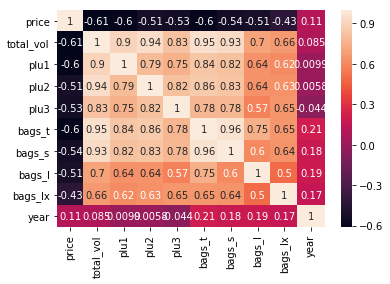

In [121]:
sns.heatmap(corrs,  annot = True)

# 9 


In [ ]:
Create a seaborne pairplot for df_product_a. What are the conclusions you can make
using the analysis sofar

# https://seaborn.pydata.org/generated/seaborn.pairplot.html

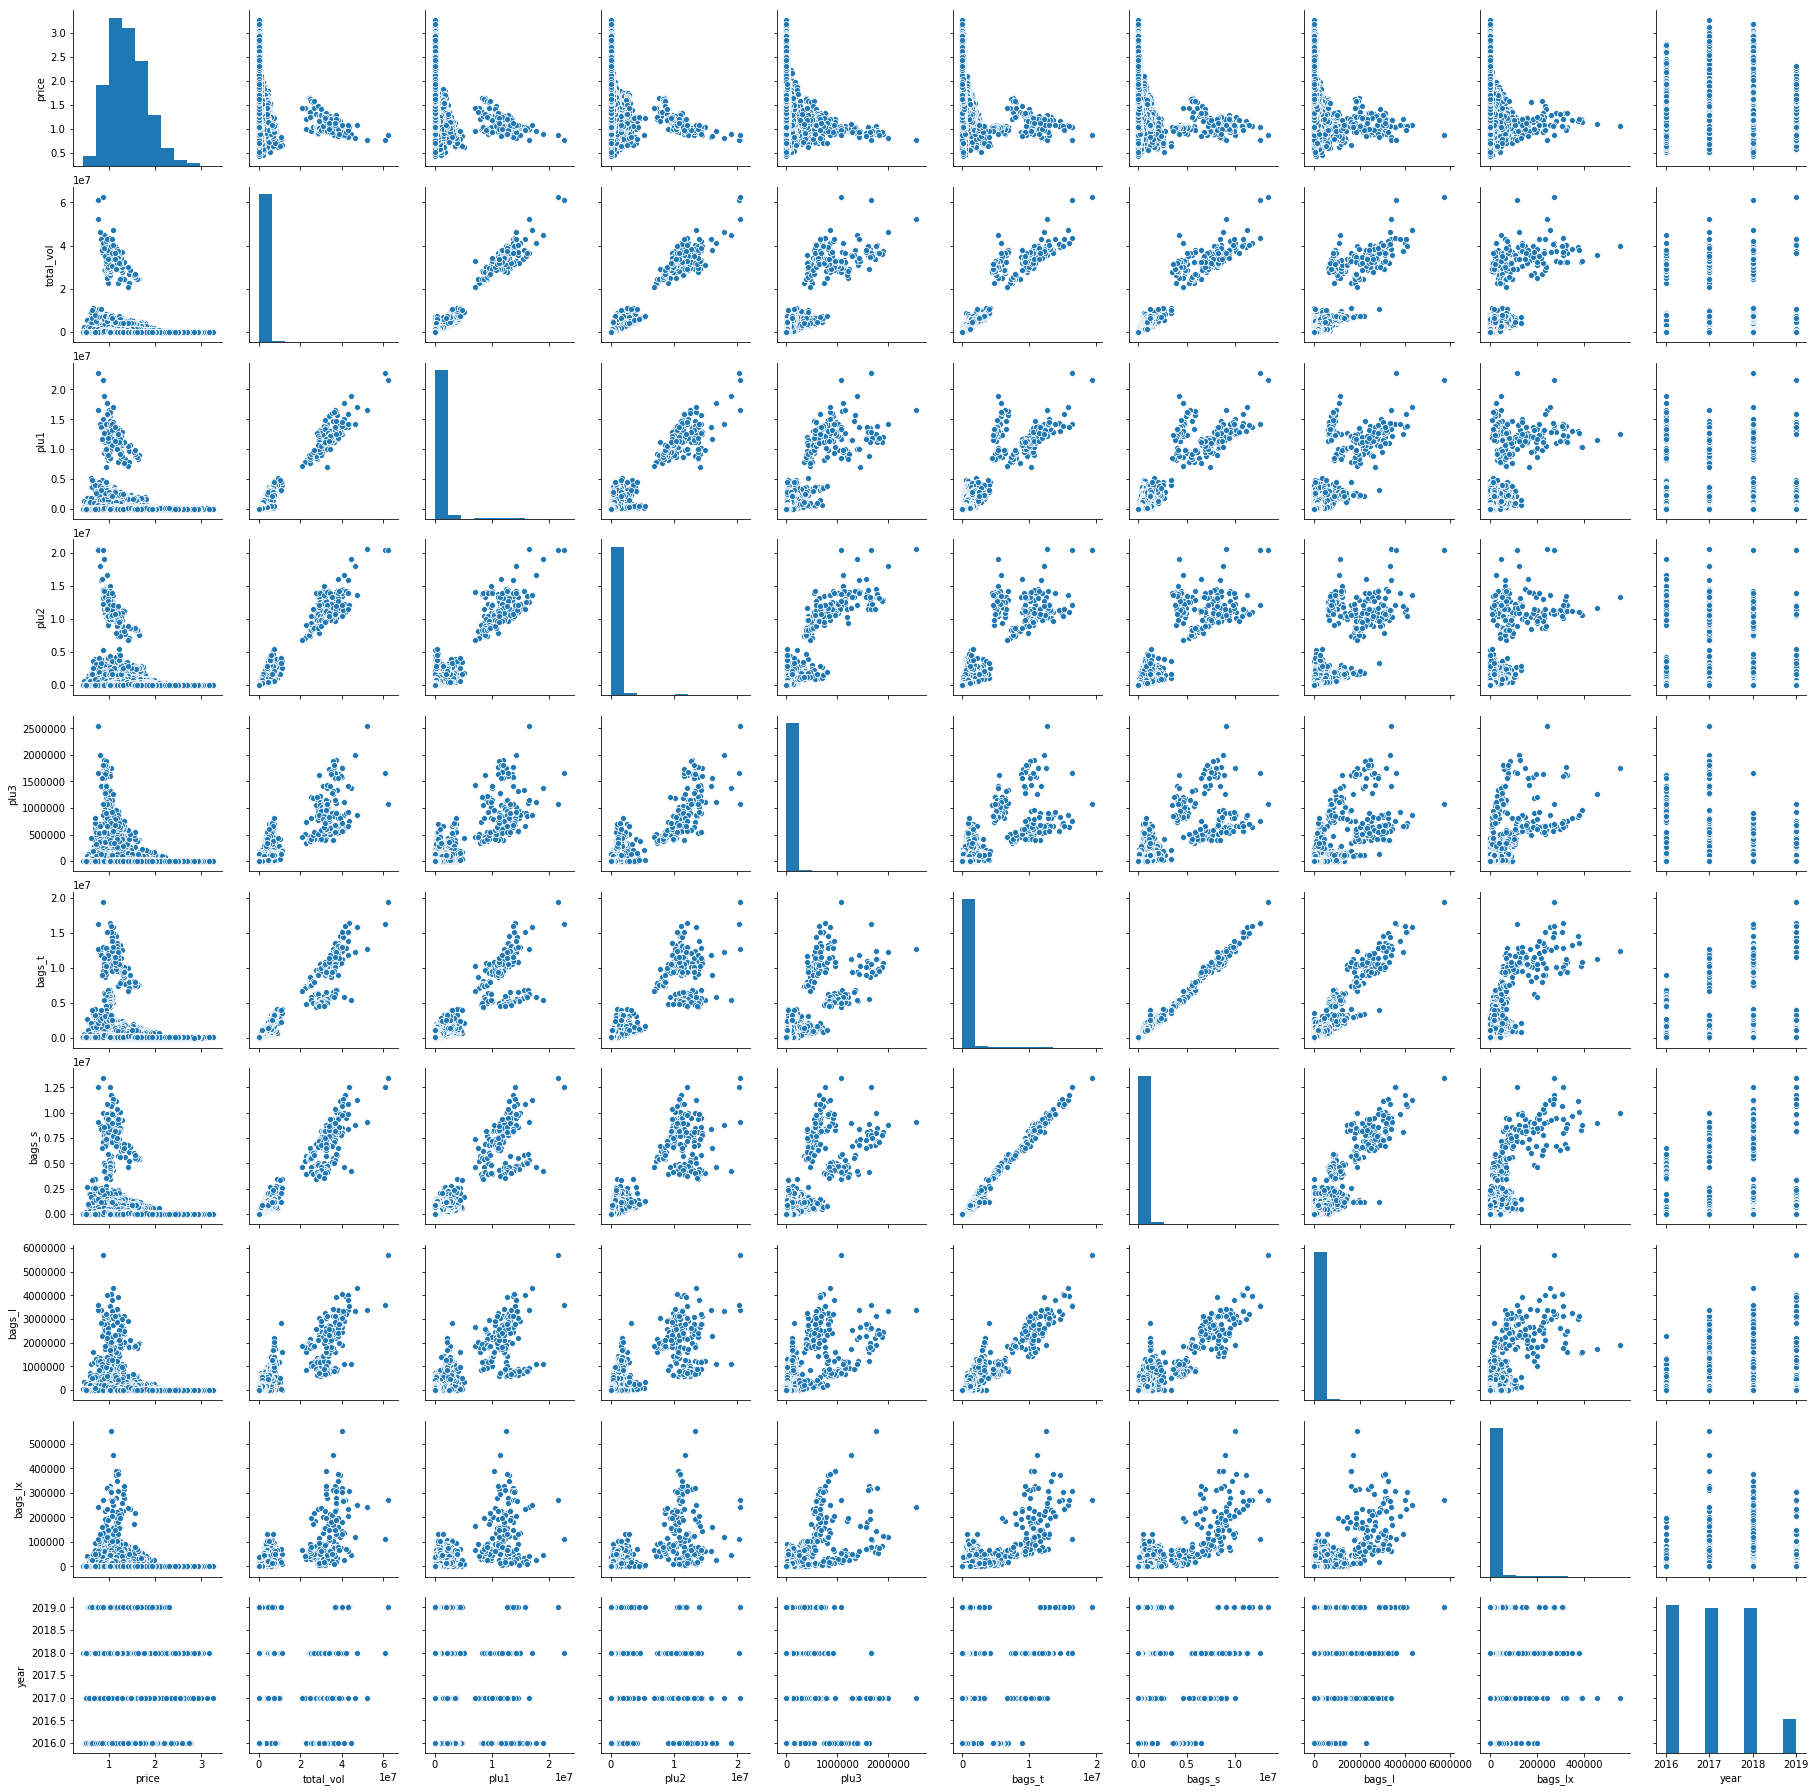

In [101]:
g = sns.pairplot(df_product_a)


In [ ]:
Using Plotly, draw weekly and monthly time-series graphs of the numeric fields. Explain
the results.

In [ ]:

import plotly.graph_objects as go

In [124]:
df_copy = df_product_a.copy(deep=True)

df_month = df_copy.groupby(['date_w']).mean().reset_index()

# Create a function to create traces
def traces(x, y, mode, name):
    trace = go.Scatter(
        x=x,
        y=y,
        mode=mode,
        name=name)
    return trace

# Define a function to customize the layout


def layouts(title1, title2, title3):
    layout = go.Layout(
        title=title1,
        xaxis=dict(
            title=title2,
            showgrid=False),
        yaxis=dict(
            title=title3),
        hovermode="closest")
    # return Layout
    return layout

In [140]:
# offline mode
import plotly.io as pio
from plotly.offline import init_notebook_mode, iplot # Import iplot and Offline from Plotly
import warnings
warnings.filterwarnings("ignore")
init_notebook_mode(connected = True) # Set Offline plotting to True
#pio.templates.default = "simple_white"

In [141]:
# Create a trace for Price
trace1 = traces(x=df_month.date_w, y=df_month.price,
                mode="lines+markers", name="price")
# add trace to data
data = [trace1]
# Customize the layout
layout = layouts(title1="Weekly and Monthly Time series data for Price", 
                 title2="Date", 
                 title3="Price (in $US)")
# Create the figure
figure = dict(data=data, layout=layout)
# Plot the figure
iplot(figure)

ModuleNotFoundError: No module named 'chart_studio'

In [159]:
#!pip install cufflinks


ModuleNotFoundError: No module named 'chart_studio'

In [160]:
# Standard plotly imports
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

ModuleNotFoundError: No module named 'chart_studio'

In [163]:
conda install - c plotly chart-studio

SyntaxError: invalid syntax (<ipython-input-163-9b8f63b6f1b8>, line 1)

In [165]:
import chart_studio.plotly 

ModuleNotFoundError: No module named 'chart_studio'